# Notebook for exploration of Wi-Fi radio link traces

In [1]:
import pandas as pd

xmits = pd.read_csv('data/desktop-saturday-afternoon/xmits.csv.gz')
#xmits = pd.read_csv('data/laptop-saturday-evening/xmits.csv.gz')

## Packet success rate over time

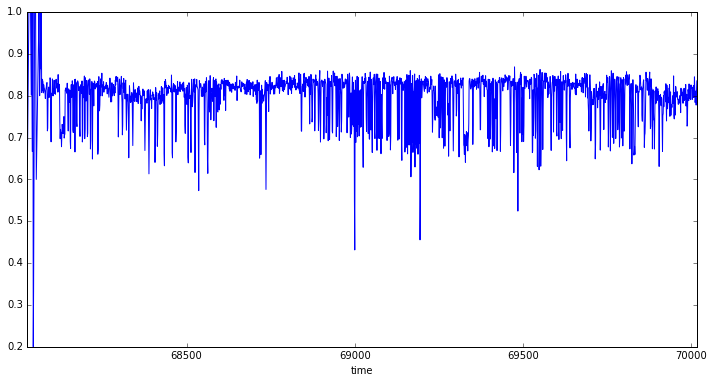

In [2]:
from matplotlib import pyplot as plt

ts = xmits.copy()

ts['time'] = ts['time'].apply(lambda t: int(float(t)))

ts = ts.groupby('time').mean()

plt.figure(figsize=(12,6))
ts['success'].plot()
plt.show()

## Separation of time axis into "good times" and "bad times"

In [3]:
bad_times = ts[ts['success'] < 0.75].index

#print "Bad times:", len(bad_times)

xmits['times'] = xmits.apply(lambda r: 'Bad' if int(r['time']) in bad_times else 'Good', axis=1)

In [4]:
g1 = xmits.drop(['time'], axis=1).groupby(['times', 'mode', 'guard', 'streams', 'name']).mean()
g1

airtime  ampdu_len   success
times mode guard streams name                               
Bad   CCK  LP    1       1.0M   10548.0   1.000000  0.709283
           SP    1       11.0M   1439.0   1.000000  0.798353
                         2.0M    5380.0   1.000000  0.840817
                         5.5M    2315.0   1.000000  0.829343
      HT20 LGI   1       MCS0    1477.0   1.000000  0.736524
                         MCS1     739.0   1.000000  0.798660
                         MCS2     493.0   1.000000  0.817973
                         MCS3     369.0   1.000000  0.818460
                         MCS4     246.0   1.000000  0.832854
                         MCS5     185.0   1.000000  0.677795
                         MCS6     164.0   1.006643  0.731802
                         MCS7     148.0   1.013744  0.768151
                 2       MCS10    246.0   1.000000  0.652748
                         MCS11    185.0   1.000000  0.676715
                         MCS12    123.0   1.008259  0.676840
                         MCS13     93.0   1.260316  0.625064
                         MCS14     82.0   1.509771  0.707884
                         MCS15     74.0   2.073119  0.697080
                         MCS8     739.0   1.000000  0.708111
                         MCS9     369.0   1.000000  0.712751
                 3       MCS16    493.0   1.000000  0.673905
                         MCS17    246.0   1.000000  0.697537
                         MCS18    164.0   1.000000  0.717764
                         MCS19    123.0   1.005926  0.768889
                         MCS20     82.0   1.551227  0.704136
                         MCS21     62.0   1.000000  0.088357
                         MCS22     55.0   1.000000  0.002681
                         MCS23     49.0   1.000000  0.000000
           SGI   1       MCS0    1329.0   1.000000  0.723608
                         MCS1     665.0   1.000000  0.730437
...                                 ...        ...       ...
Good  HT20 LGI   3       MCS18    164.0   1.000000  0.885891
                         MCS19    123.0   1.001776  0.895409
                         MCS20     82.0   1.092786  0.851407
                         MCS21     62.0   1.000000  0.111595
                         MCS22     55.0   1.000000  0.004892
                         MCS23     49.0   1.000000  0.000049
           SGI   1       MCS0    1329.0   1.000000  0.877674
                         MCS1     665.0   1.000000  0.876586
                         MCS2     443.0   1.000000  0.865674
                         MCS3     332.0   1.000000  0.866741
                         MCS4     222.0   1.000000  0.886912
                         MCS5     166.0   1.000000  0.927276
                         MCS6     148.0   1.000000  0.913380
                         MCS7     133.0   1.001160  0.933009
                 2       MCS10    222.0   1.000000  0.898860
                         MCS11    166.0   1.000000  0.906950
                         MCS12    111.0   1.000447  0.899970
                         MCS13     83.0   1.073434  0.901154
                         MCS14     74.0   1.899415  0.879438
                         MCS15     67.0   2.668645  0.873712
                         MCS8     665.0   1.000000  0.883705
                         MCS9     332.0   1.000000  0.882867
                 3       MCS16    443.0   1.000000  0.885702
                         MCS17    222.0   1.000000  0.894377
                         MCS18    148.0   1.000000  0.880751
                         MCS19    111.0   1.000088  0.878881
                         MCS20     74.0   1.799194  0.854943
                         MCS21     56.0   1.000000  0.108113
                         MCS22     49.0   1.000000  0.005061
                         MCS23     44.0   1.000000  0.000202

[104 rows x 3 columns]